**<span style="color:white">Intoduction to Statistical Inference</span>**  
**<span style="color:grey">Homework #05</span>** 

**<span style="color:blue">Erfan Panahi - 810103084</span>**  

# **<span style="color:red">Problem 5.</span>**  

### **<span style="color:green">Required Packages</span>**  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### **<span style="color:green">Defining p-values</span>**  

In [3]:
p_values = [0.361, 0.387, 0.005, 0.009, 0.022, 0.051, 0.101, 0.019]
m = len(p_values)
sorted_p_values = np.sort(p_values)
ranks = np.arange(1, m + 1)

### **<span style="color:green">Critical values for BH procedure (alpha = 0.05)</span>**  

In [4]:
alpha = 0.05
critical_values = (ranks / m) * alpha

### **<span style="color:green">Results</span>**  

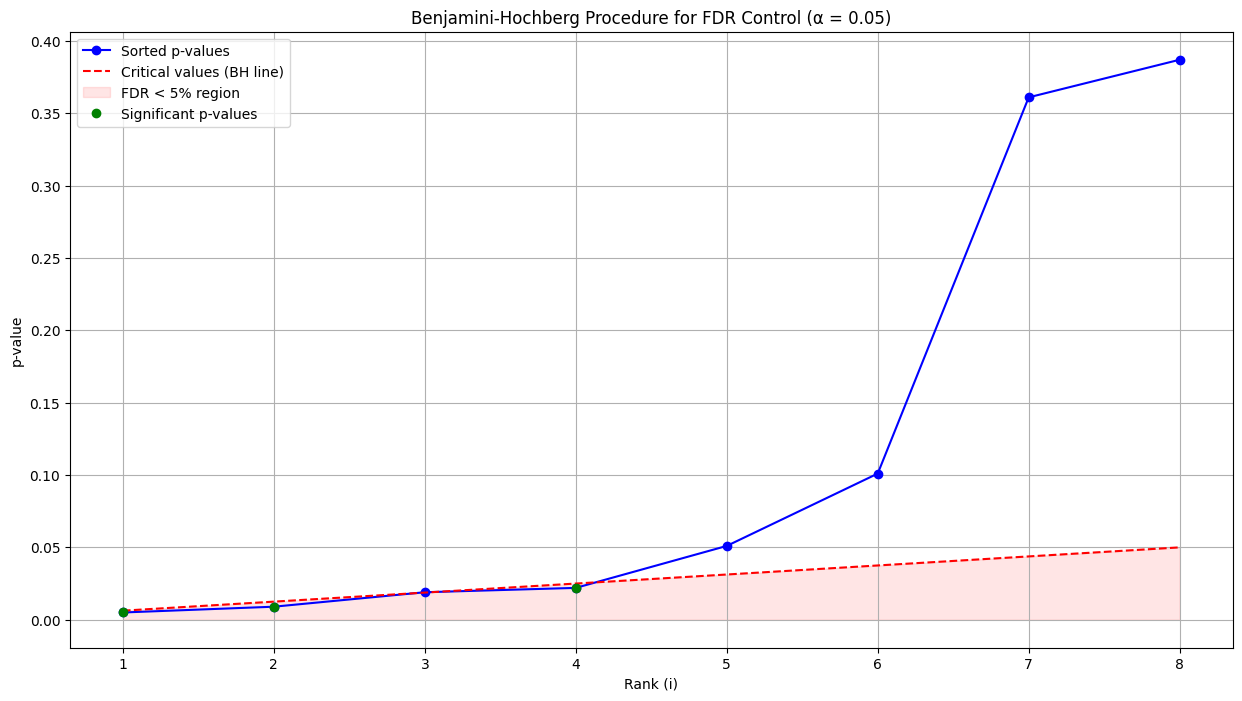

In [10]:
plt.figure(figsize = (15, 8))
plt.plot(ranks, sorted_p_values, 'bo-', label = 'Sorted p-values')
plt.plot(ranks, critical_values, 'r--', label = 'Critical values (BH line)')
plt.fill_between(ranks, 0, critical_values, color='red', alpha=0.1, label='FDR < 5% region')

significant = sorted_p_values <= critical_values
plt.plot(ranks[significant], sorted_p_values[significant], 'go', label = 'Significant p-values')


plt.xlabel('Rank (i)')
plt.ylabel('p-value')
plt.title('Benjamini-Hochberg Procedure for FDR Control (α = 0.05)')
plt.legend()
plt.grid(True)
plt.show()

# **<span style="color:red">Problem 6.</span>**  

### **<span style="color:green">Required Packages</span>**  

In [21]:
import pandas as pd  
import scipy.stats as stats  
from statsmodels.stats.multicomp import pairwise_tukeyhsd  

### **<span style="color:green">Defining the Data</span>**  

In [22]:
data = {  
    'Lemon': [11, 10, 12],  
    'Floral': [11, 14, 11],  
    'Fried': [5, 5, 7],  
    'Control': [8, 7, 6]  
}  
df = pd.DataFrame(data).melt(var_name='Aroma', value_name='Score')  

### **<span style="color:green">Applying the ANOVA</span>**  

In [25]:
f_val, p_val = stats.f_oneway(*data.values())  
print(f"F-statistic: {f_val:.5f}, p-value: {p_val:.5f}")  

F-statistic: 17.73684, p-value: 0.00068


### **<span style="color:green">Tukey’s method</span>**  

In [26]:
tukey = pairwise_tukeyhsd(df['Score'], df['Aroma'], alpha=0.05)  
print(tukey.summary()) 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Control Floral      5.0 0.0054  1.7099  8.2901   True
Control  Fried  -1.3333  0.589 -4.6234  1.9568  False
Control  Lemon      4.0 0.0192  0.7099  7.2901   True
 Floral  Fried  -6.3333 0.0012 -9.6234 -3.0432   True
 Floral  Lemon     -1.0 0.7679 -4.2901  2.2901  False
  Fried  Lemon   5.3333 0.0037  2.0432  8.6234   True
-----------------------------------------------------
